# Titanic Set
1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

2. Evaluate your results using the model score, confusion matrix, and classification report.

3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

4. Run through steps 1-3 setting k to 10

5. Run through steps 1-3 setting k to 20

6. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?

7. Which model performs best on our out-of-sample data from validate?

In [45]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import acquire as acq
import prepare as prep
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix,plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

In [16]:
titanic=acq.titanic_data()
titanic=prep.prep_titanic(titanic)
train,validate,test=prep.split_data(titanic,'survived')

In [86]:
train=train.fillna(0)
validate=validate.fillna(0)
test=test.fillna(0)


In [87]:
x_train=train[['sibsp','age','sex_male']]
y_train= train.survived
x_validate=validate[['sibsp','age','sex_male']]
y_validate= validate.survived
x_test=test[['sibsp','age','sex_male']]
y_test= test.survived

1. Fit a K-Nearest Neighbors classifier to your training sample and transform (i.e. make predictions on the training sample)

In [26]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
y_pred=knn.predict(x_train)

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


2. Evaluate your results using the model score, confusion matrix, and classification report.

In [30]:
confusion_matrix(y_train,y_pred)

array([[291,  38],
       [ 66, 139]])

/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/usr/local/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


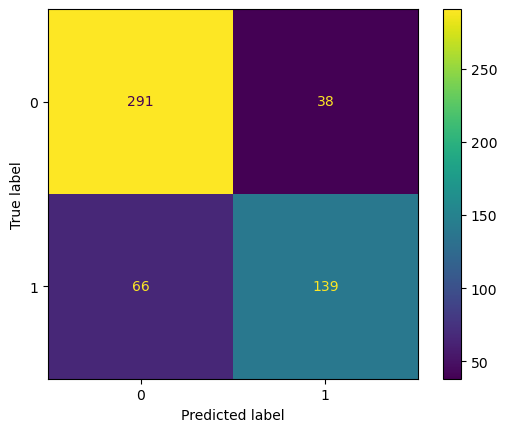

In [34]:
plot_confusion_matrix(knn,x_train,y_train);

In [35]:
print(classification_report(y_train,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       329
           1       0.79      0.68      0.73       205

    accuracy                           0.81       534
   macro avg       0.80      0.78      0.79       534
weighted avg       0.80      0.81      0.80       534



3. Print and clearly label the following: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.

In [37]:
conf=confusion_matrix(y_train,y_pred)
conf.ravel()
TN, FP, FN, TP = conf.ravel()

In [38]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [40]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8052434456928839

True Positive Rate/Sensitivity/Recall/Power: 0.6780487804878049
False Positive Rate/False Alarm Ratio/Fall-out: 0.11550151975683891
True Negative Rate/Specificity/Selectivity: 0.8844984802431611
False Negative Rate/Miss Rate: 0.32195121951219513

Precision/PPV: 0.7853107344632768
F1 Score: 0.7277486910994764

Support (0): 205
Support (1): 329


4. Run through steps 1-3 setting k to 10

In [51]:
knn10=KNeighborsClassifier(n_neighbors=10)
knn10.fit(x_train,y_train)
round(knn10.score(x_train,y_train)*100,3)

77.903

In [52]:
y_pred10=knn10.predict(x_train)

In [53]:
confusion_matrix(y_train,y_pred)

array([[291,  38],
       [ 66, 139]])

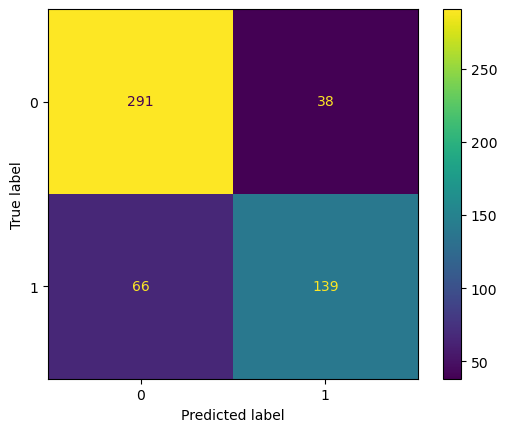

In [54]:
plot_confusion_matrix(knn,x_train,y_train);

In [59]:
print(classification_report(y_train,y_pred10))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84       329
           1       0.84      0.53      0.65       205

    accuracy                           0.78       534
   macro avg       0.80      0.73      0.74       534
weighted avg       0.79      0.78      0.77       534



In [62]:
conf=confusion_matrix(y_train,y_pred10)
conf.ravel()
TN, FP, FN, TP = conf.ravel()

In [61]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [63]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.8052434456928839

True Positive Rate/Sensitivity/Recall/Power: 0.6780487804878049
False Positive Rate/False Alarm Ratio/Fall-out: 0.11550151975683891
True Negative Rate/Specificity/Selectivity: 0.8844984802431611
False Negative Rate/Miss Rate: 0.32195121951219513

Precision/PPV: 0.7853107344632768
F1 Score: 0.7277486910994764

Support (0): 205
Support (1): 329


5. Run through steps 1-3 setting k to 20

In [64]:
knn20=KNeighborsClassifier(n_neighbors=20)
knn20.fit(x_train,y_train)
round(knn10.score(x_train,y_train)*100,3)

77.903

In [65]:
y_pred20=knn20.predict(x_train)

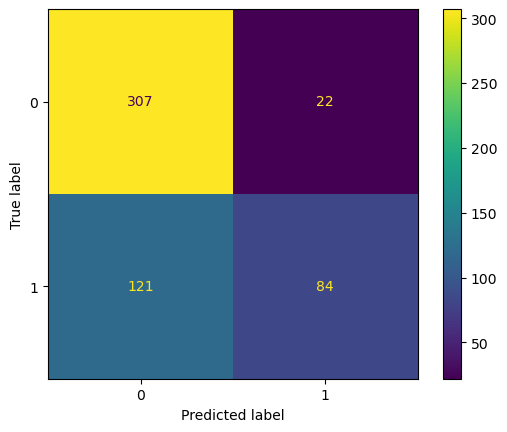

In [67]:
plot_confusion_matrix(knn20,x_train,y_train);

In [68]:
print(classification_report(y_train,y_pred20))

              precision    recall  f1-score   support

           0       0.72      0.93      0.81       329
           1       0.79      0.41      0.54       205

    accuracy                           0.73       534
   macro avg       0.75      0.67      0.68       534
weighted avg       0.75      0.73      0.71       534



In [69]:
conf=confusion_matrix(y_train,y_pred20)
conf.ravel()
TN, FP, FN, TP = conf.ravel()

In [70]:
all_ = (TP + TN + FP + FN)

accuracy = (TP + TN) / all_

TPR = recall = TP / (TP + FN)
FPR = FP / (FP + TN)

TNR = TN / (FP + TN)
FNR = FN / (FN + TP)

precision =  TP / (TP + FP)
f1 =  2 * ((precision * recall) / ( precision + recall))

support_pos = TP + FN
support_neg = FP + TN

In [71]:
print(f"Accuracy: {accuracy}\n")
print(f"True Positive Rate/Sensitivity/Recall/Power: {TPR}")
print(f"False Positive Rate/False Alarm Ratio/Fall-out: {FPR}")
print(f"True Negative Rate/Specificity/Selectivity: {TNR}")
print(f"False Negative Rate/Miss Rate: {FNR}\n")
print(f"Precision/PPV: {precision}")
print(f"F1 Score: {f1}\n")
print(f"Support (0): {support_pos}")
print(f"Support (1): {support_neg}")

Accuracy: 0.7322097378277154

True Positive Rate/Sensitivity/Recall/Power: 0.4097560975609756
False Positive Rate/False Alarm Ratio/Fall-out: 0.0668693009118541
True Negative Rate/Specificity/Selectivity: 0.9331306990881459
False Negative Rate/Miss Rate: 0.5902439024390244

Precision/PPV: 0.7924528301886793
F1 Score: 0.5401929260450161

Support (0): 205
Support (1): 329


5. What are the differences in the evaluation metrics? Which performs better on your in-sample data? Why?
- The default knn performed better on my train data, due to overfitting.

6. Which model performs best on our out-of-sample data from validate?
- The default knn and knn10 performed the best with the validate data. 

In [90]:
print(f"""Accuracy of KNN (k=5) classifier on validate set: {knn.score(x_train, y_train):.2f}
     
Accuracy of KNN (k=10) classifier on validate set: {knn10.score(x_train, y_train):.2f}

Accuracy of KNN (k=20) classifier on validate set: {knn20.score(x_train, y_train):.2f}
""")

Accuracy of KNN (k=5) classifier on validate set: 0.81
     
Accuracy of KNN (k=10) classifier on validate set: 0.78

Accuracy of KNN (k=20) classifier on validate set: 0.73



In [89]:
print(f"""Accuracy of KNN (k=5) classifier on validate set: {knn.score(x_validate, y_validate):.2f}
     
Accuracy of KNN (k=10) classifier on validate set: {knn10.score(x_validate, y_validate):.2f}

Accuracy of KNN (k=20) classifier on validate set: {knn20.score(x_validate, y_validate):.2f}
""")

Accuracy of KNN (k=5) classifier on validate set: 0.73
     
Accuracy of KNN (k=10) classifier on validate set: 0.70

Accuracy of KNN (k=20) classifier on validate set: 0.69



In [91]:
baseline_accuracy=329/(329+205)
baseline_accuracy*100

61.61048689138576

In [93]:
metrics = []

for k in range(1,21):
    
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # FIT the thing (remember only fit on training data)
    knn.fit(x_train, y_train)
    
    # USE the thing (calculate accuracy)
    train_score = knn.score(x_train, y_train)
    validate_score = knn.score(x_validate, y_validate)
    
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score
    }
    
    metrics.append(output)

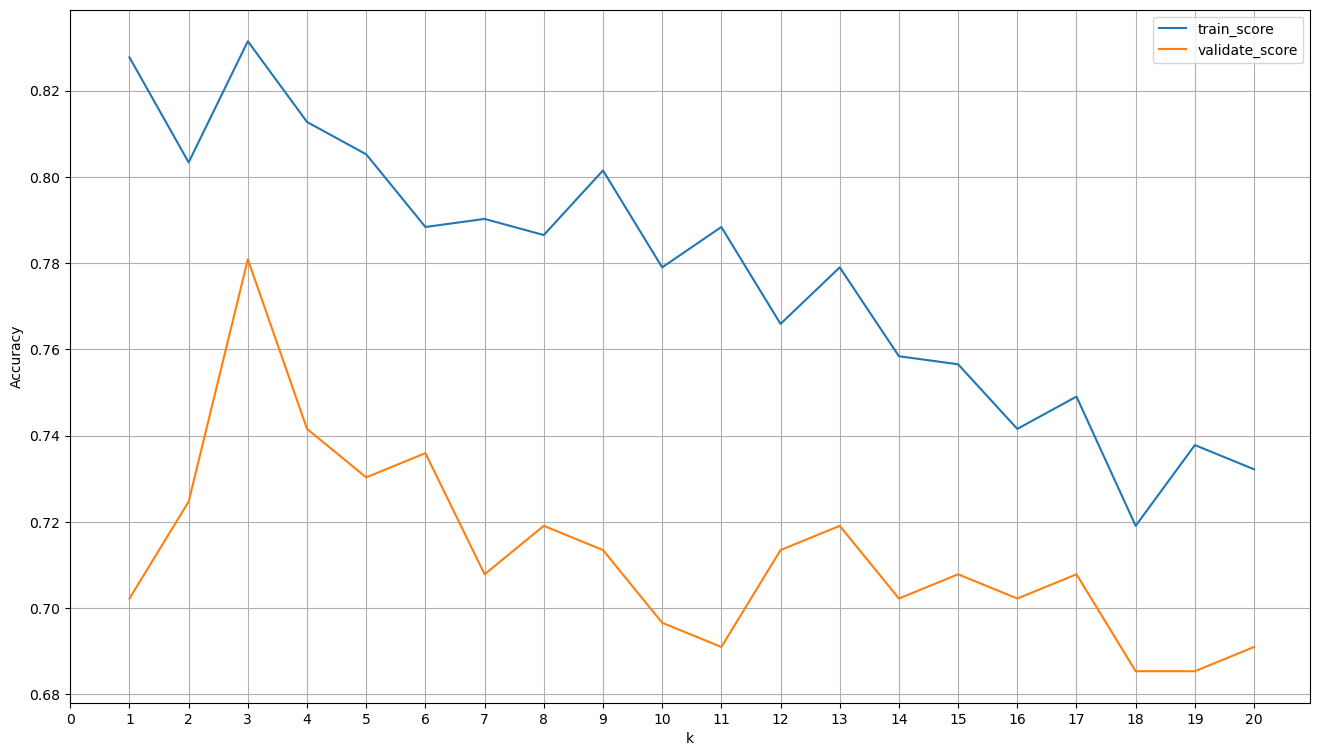

In [94]:
results = pd.DataFrame(metrics)
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,21,1))
plt.grid()

In [95]:
metrics = []

for k in range(1,11):
    
    # MAKE the thing
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # FIT the thing (remember only fit on training data)
    knn.fit(x_train, y_train)
    
    # USE the thing (calculate accuracy)
    train_score = knn.score(x_train, y_train)
    validate_score = knn.score(x_validate, y_validate)
    
    output = {
        "k": k,
        "train_score": train_score,
        "validate_score": validate_score
    }
    
    metrics.append(output)

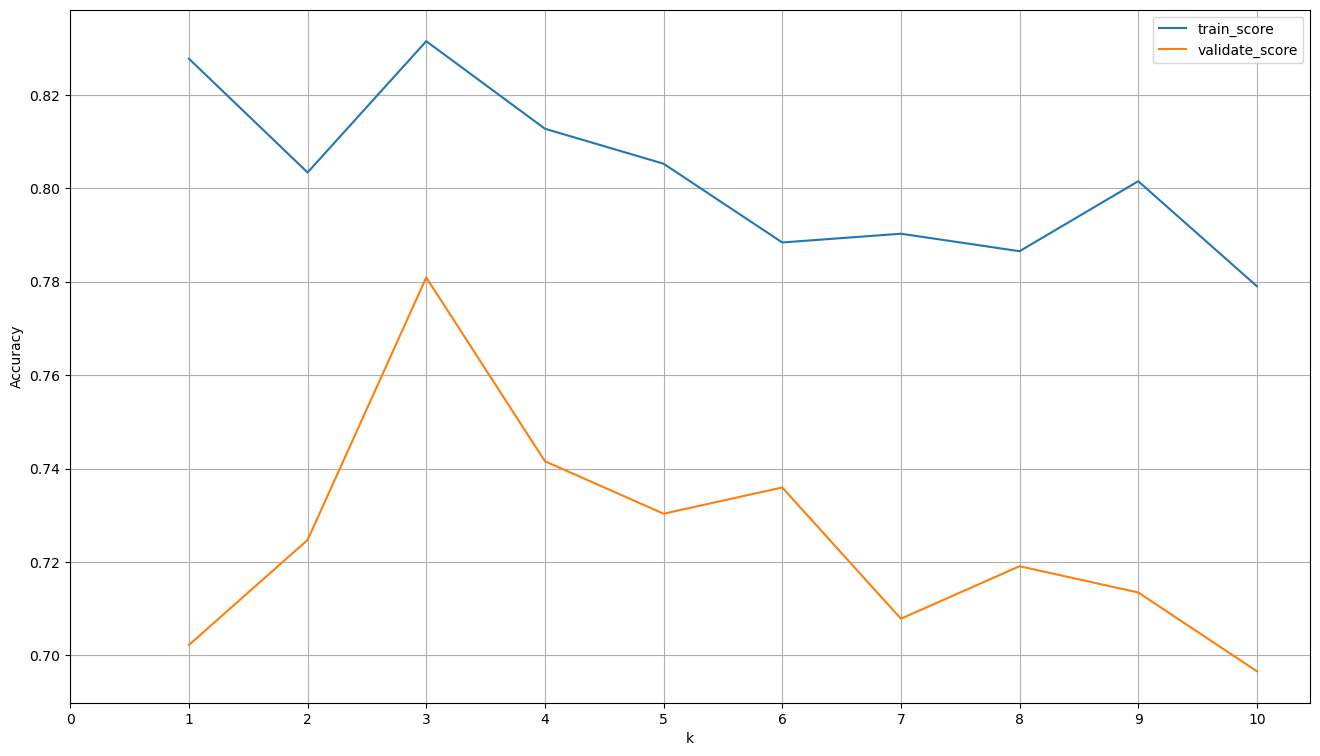

In [97]:
results = pd.DataFrame(metrics)
results.set_index('k').plot(figsize = (16,9))
plt.ylabel('Accuracy')
plt.xticks(np.arange(0,11,1))
plt.grid()

model 3 would perform the best on both train and validate data